In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
SatisfiedLevel = pd.read_csv('E:\\DEPI\\final_project\\HR\\SatisfiedLevel.csv')
RatingLevel = pd.read_csv('E:\\DEPI\\final_project\\HR\\RatingLevel.csv')
PerformanceRating = pd.read_csv('E:\\DEPI\\final_project\\HR\\PerformanceRating.csv') 
Employee = pd.read_csv('E:\\DEPI\\final_project\\HR\\Employee.csv')
EducationLevel = pd.read_csv('E:\\DEPI\\final_project\\HR\\EducationLevel.csv') 

In [3]:
SatisfiedLevel

,SatisfactionID,SatisfactionLevel
0,1,Very Dissatisfied
1,2,Dissatisfied
2,3,Neutral
3,4,Satisfied
4,5,Very Satisfied


In [4]:
RatingLevel

,RatingID,RatingLevel
0,1,Unacceptable
1,2,Needs Improvement
2,3,Meets Expectation
3,4,Exceeds Expectation
4,5,Above and Beyond


In [5]:
EducationLevel

,EducationLevelID,EducationLevel
0,1,No Formal Qualifications
1,2,High School
2,3,Bachelors
3,4,Masters
4,5,Doctorate


In [6]:
EducationLevel.rename(columns={
    'EducationLevelID': 'Education'
}, inplace=True)  

In [7]:
PerformanceRating

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,1/2/2013,5,4,5,1,0,4,4,4
1,PR02,B61E-0F26,1/3/2013,5,4,4,1,3,4,4,3
2,PR03,F5E3-48BB,1/3/2013,3,4,5,3,2,3,5,4
3,PR04,0678-748A,1/4/2013,5,3,2,2,0,2,3,2
4,PR05,541F-3E19,1/4/2013,5,2,3,1,0,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...
6704,PR995,4F28-CFAF,3/14/2016,5,3,3,3,1,5,5,4
6705,PR996,7C80-94E0,3/14/2016,3,5,4,2,1,3,4,4
6706,PR997,8233-2483,3/14/2016,3,4,2,3,1,2,3,2
6707,PR998,8A5B-3D6E,3/15/2016,5,2,5,2,2,4,3,3


In [8]:
PerformanceRating.isnull().sum()

PerformanceID                      0
EmployeeID                         0
ReviewDate                         0
EnvironmentSatisfaction            0
JobSatisfaction                    0
RelationshipSatisfaction           0
TrainingOpportunitiesWithinYear    0
TrainingOpportunitiesTaken         0
WorkLifeBalance                    0
SelfRating                         0
ManagerRating                      0
dtype: int64

In [9]:
PerformanceRating.shape

(6709, 11)

In [10]:
PerformanceRating.dtypes

PerformanceID                      object
EmployeeID                         object
ReviewDate                         object
EnvironmentSatisfaction             int64
JobSatisfaction                     int64
RelationshipSatisfaction            int64
TrainingOpportunitiesWithinYear     int64
TrainingOpportunitiesTaken          int64
WorkLifeBalance                     int64
SelfRating                          int64
ManagerRating                       int64
dtype: object

In [11]:
PerformanceRating['ReviewDate'] = pd.to_datetime(PerformanceRating['ReviewDate'])

In [12]:
PerformanceRating.dtypes

PerformanceID                              object
EmployeeID                                 object
ReviewDate                         datetime64[ns]
EnvironmentSatisfaction                     int64
JobSatisfaction                             int64
RelationshipSatisfaction                    int64
TrainingOpportunitiesWithinYear             int64
TrainingOpportunitiesTaken                  int64
WorkLifeBalance                             int64
SelfRating                                  int64
ManagerRating                               int64
dtype: object

In [13]:
PerformanceRating.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6704    False
6705    False
6706    False
6707    False
6708    False
Length: 6709, dtype: bool

In [14]:
PerformanceRating.head()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,2013-01-02,5,4,5,1,0,4,4,4
1,PR02,B61E-0F26,2013-01-03,5,4,4,1,3,4,4,3
2,PR03,F5E3-48BB,2013-01-03,3,4,5,3,2,3,5,4
3,PR04,0678-748A,2013-01-04,5,3,2,2,0,2,3,2
4,PR05,541F-3E19,2013-01-04,5,2,3,1,0,4,4,3


In [15]:
Employee

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,467E-977A,Jud,Melanaphy,Male,20,Some Travel,Technology,28,CA,Black or African American,...,Single,38508,0,No,2022-12-26,No,0,0,0,0
1466,6FB9-A624,Marc,Calver,Non-Binary,27,Some Travel,Technology,8,CA,Black or African American,...,Single,92995,3,No,2022-12-30,No,0,0,0,0
1467,EBF4-5928,Rudolph,MacDearmont,Male,21,Some Travel,Sales,4,CA,Black or African American,...,Single,63375,0,No,2022-12-30,No,0,0,0,0
1468,60E6-B1D9,Merill,Agg,Male,21,Some Travel,Technology,7,CA,Black or African American,...,Married,46521,0,No,2022-12-30,No,0,0,0,0


In [16]:
Employee.isnull().sum()

EmployeeID                 0
FirstName                  0
LastName                   0
Gender                     0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome (KM)      0
State                      0
Ethnicity                  0
Education                  0
EducationField             0
JobRole                    0
MaritalStatus              0
Salary                     0
StockOptionLevel           0
OverTime                   0
HireDate                   0
Attrition                  0
YearsAtCompany             0
YearsInMostRecentRole      0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [17]:
Employee.shape

(1470, 23)

In [18]:
Employee.columns

Index(['EmployeeID', 'FirstName', 'LastName', 'Gender', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome (KM)', 'State',
       'Ethnicity', 'Education', 'EducationField', 'JobRole', 'MaritalStatus',
       'Salary', 'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition',
       'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [19]:
Employee.dtypes

EmployeeID                 object
FirstName                  object
LastName                   object
Gender                     object
Age                         int64
BusinessTravel             object
Department                 object
DistanceFromHome (KM)       int64
State                      object
Ethnicity                  object
Education                   int64
EducationField             object
JobRole                    object
MaritalStatus              object
Salary                      int64
StockOptionLevel            int64
OverTime                   object
HireDate                   object
Attrition                  object
YearsAtCompany              int64
YearsInMostRecentRole       int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [20]:
Employee['HireDate']=pd.to_datetime(Employee['HireDate'])

In [21]:
Employee.dtypes

EmployeeID                         object
FirstName                          object
LastName                           object
Gender                             object
Age                                 int64
BusinessTravel                     object
Department                         object
DistanceFromHome (KM)               int64
State                              object
Ethnicity                          object
Education                           int64
EducationField                     object
JobRole                            object
MaritalStatus                      object
Salary                              int64
StockOptionLevel                    int64
OverTime                           object
HireDate                   datetime64[ns]
Attrition                          object
YearsAtCompany                      int64
YearsInMostRecentRole               int64
YearsSinceLastPromotion             int64
YearsWithCurrManager                int64
dtype: object

In [22]:
Employee.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [23]:
Employee.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


# Exploratory data analysis

How Environment Satisfaction, Job Satisfaction, and Relationship Satisfaction vary across different employee?

In [24]:
combined_df = pd.merge(Employee, PerformanceRating, on='EmployeeID')
combined_df.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR1295,2016-10-30,3,3,2,3,0,4,3,3
1,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR1908,2017-10-30,4,4,5,3,1,2,3,2
2,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR2617,2018-10-30,5,5,4,3,0,4,5,5
3,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR3436,2019-10-30,1,3,2,3,1,3,5,4
4,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR411,2014-10-31,3,4,2,1,0,3,4,3


In [25]:
combined_df.columns

Index(['EmployeeID', 'FirstName', 'LastName', 'Gender', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome (KM)', 'State',
       'Ethnicity', 'Education', 'EducationField', 'JobRole', 'MaritalStatus',
       'Salary', 'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition',
       'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceID', 'ReviewDate',
       'EnvironmentSatisfaction', 'JobSatisfaction',
       'RelationshipSatisfaction', 'TrainingOpportunitiesWithinYear',
       'TrainingOpportunitiesTaken', 'WorkLifeBalance', 'SelfRating',
       'ManagerRating'],
      dtype='object')

In [26]:
combined_df.shape

(6709, 33)

We can analyze correlations between different satisfaction levels and other factors like Department, JobRole, and WorkLifeBalance , Salary , YearsAtCompany, YearsSinceLastPromotion 

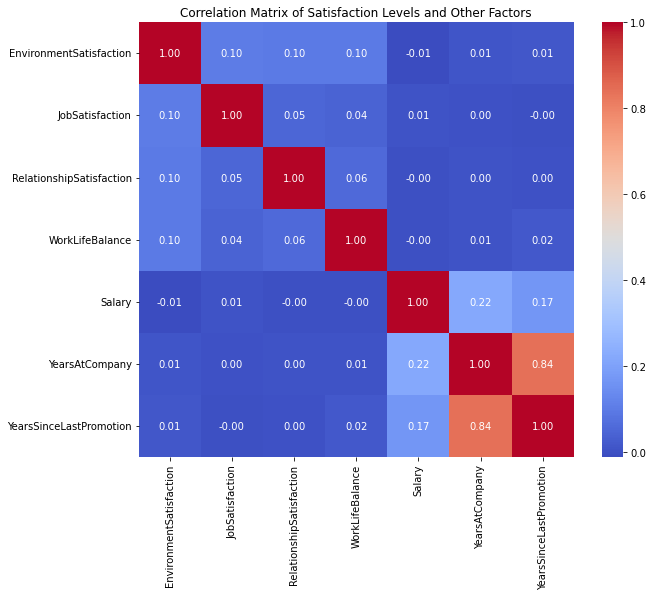

In [27]:
correlation_matrix = combined_df[['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 
                                   'WorkLifeBalance', 'Salary', 'YearsAtCompany', 'YearsSinceLastPromotion']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Satisfaction Levels and Other Factors')
plt.show()

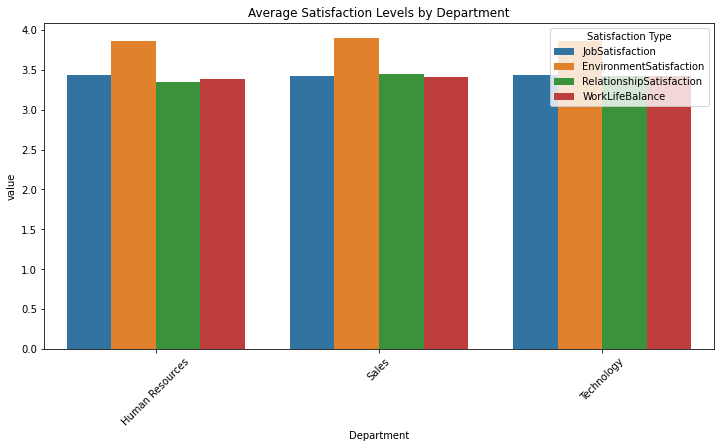

In [28]:
department_satisfaction = combined_df.groupby('Department')[['JobSatisfaction', 'EnvironmentSatisfaction', 
                                                             'RelationshipSatisfaction', 'WorkLifeBalance']].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=department_satisfaction.melt(id_vars='Department',value_vars=['JobSatisfaction', 'EnvironmentSatisfaction','RelationshipSatisfaction', 'WorkLifeBalance']),
            x='Department', y='value', hue='variable')
plt.title('Average Satisfaction Levels by Department')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction Type')
plt.show()

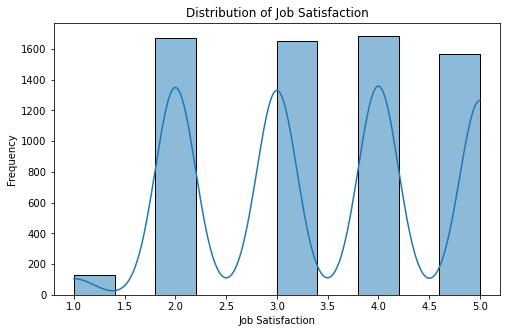

In [29]:
#Distribution of Job Satisfaction
plt.figure(figsize=(8, 5))
sns.histplot(combined_df['JobSatisfaction'], bins=10, kde=True)
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Frequency')
plt.show()

Job Satisfaction by Salary Category

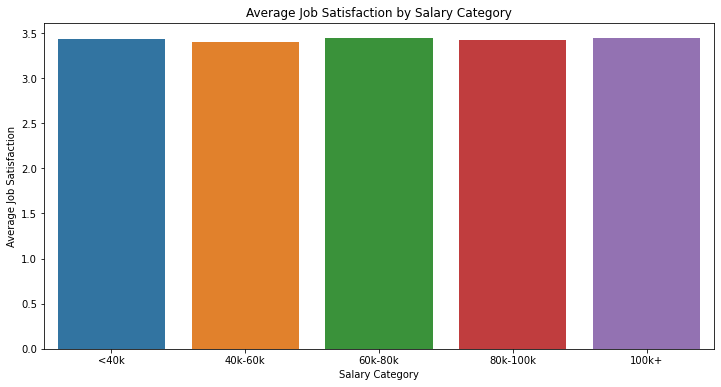

In [30]:
combined_df['Salary_Category'] = pd.cut(combined_df['Salary'], bins=[0, 40000, 60000, 80000, 100000, 547204], labels=['<40k', '40k-60k', '60k-80k', '80k-100k', '100k+'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Salary_Category', y='JobSatisfaction', data=combined_df, ci=None)
plt.title('Average Job Satisfaction by Salary Category')
plt.ylabel('Average Job Satisfaction')
plt.xlabel('Salary Category')
plt.show()

Salary Distribution

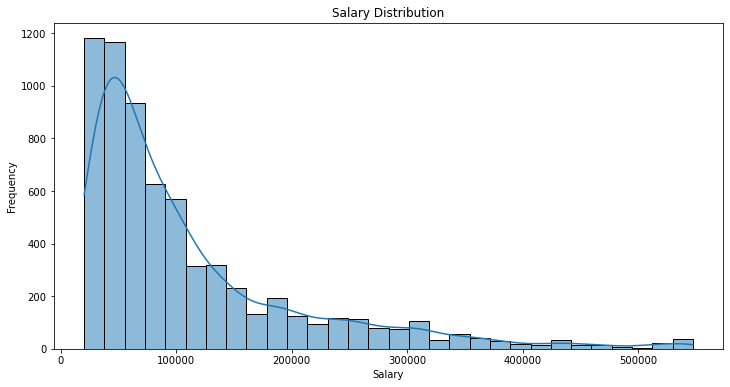

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(combined_df['Salary'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

Average Job Satisfaction by Education Level

In [32]:
combined_df2=pd.merge(combined_df, EducationLevel, on='Education')
combined_df2.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating,Salary_Category,EducationLevel
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,3,3,2,3,0,4,3,3,100k+,Doctorate
1,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,4,4,5,3,1,2,3,2,100k+,Doctorate
2,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,5,5,4,3,0,4,5,5,100k+,Doctorate
3,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,1,3,2,3,1,3,5,4,100k+,Doctorate
4,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,3,4,2,1,0,3,4,3,100k+,Doctorate


In [33]:
combined_df2.shape

(6709, 35)

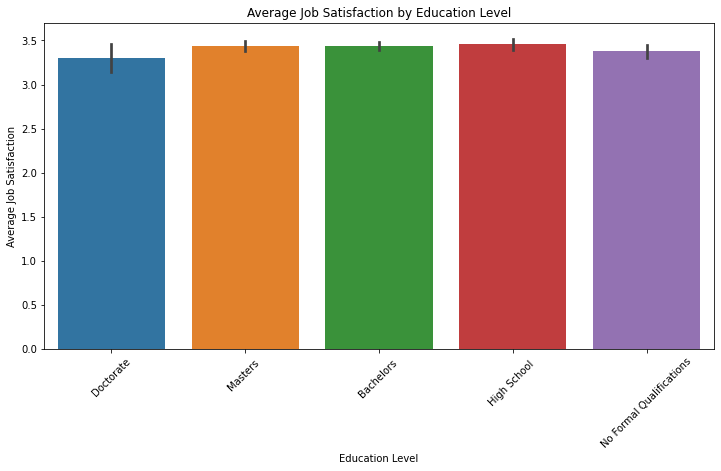

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x='EducationLevel', y='JobSatisfaction', data=combined_df2)
plt.title('Average Job Satisfaction by Education Level')
plt.xticks(rotation=45)
plt.ylabel('Average Job Satisfaction')
plt.xlabel('Education Level')
plt.show()

In [35]:
df_merged = (
    PerformanceRating
    .merge(RatingLevel, left_on='SelfRating', right_on='RatingID', how='left')
    .rename(columns={'RatingLevel': 'SelfRatingLevel'})
    .merge(RatingLevel, left_on='ManagerRating', right_on='RatingID', how='left')
    .rename(columns={'RatingLevel': 'ManagerRatingLevel'})
    .drop(columns=['RatingID_x', 'RatingID_y'])  
)
df_merged = (
    df_merged
    .merge(SatisfiedLevel, left_on='JobSatisfaction', right_on='SatisfactionID', how='left')
    .merge(SatisfiedLevel, left_on='EnvironmentSatisfaction', right_on='SatisfactionID', how='left')
    .merge(SatisfiedLevel, left_on='RelationshipSatisfaction', right_on='SatisfactionID', how='left')
    .rename(columns={
        'SatisfactionLevel_x': 'JobSatisfactionLevel',
        'SatisfactionLevel_y': 'EnvironmentSatisfactionLevel',
        'SatisfactionLevel': 'RelationshipSatisfactionLevel'
    })
    .drop(columns=['SatisfactionID_x', 'SatisfactionID_y', 'SatisfactionID'])  
)

df_merged.head()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating,SelfRatingLevel,ManagerRatingLevel,JobSatisfactionLevel,EnvironmentSatisfactionLevel,RelationshipSatisfactionLevel
0,PR01,79F7-78EC,2013-01-02,5,4,5,1,0,4,4,4,Exceeds Expectation,Exceeds Expectation,Satisfied,Very Satisfied,Very Satisfied
1,PR02,B61E-0F26,2013-01-03,5,4,4,1,3,4,4,3,Exceeds Expectation,Meets Expectation,Satisfied,Very Satisfied,Satisfied
2,PR03,F5E3-48BB,2013-01-03,3,4,5,3,2,3,5,4,Above and Beyond,Exceeds Expectation,Satisfied,Neutral,Very Satisfied
3,PR04,0678-748A,2013-01-04,5,3,2,2,0,2,3,2,Meets Expectation,Needs Improvement,Neutral,Very Satisfied,Dissatisfied
4,PR05,541F-3E19,2013-01-04,5,2,3,1,0,4,4,3,Exceeds Expectation,Meets Expectation,Dissatisfied,Very Satisfied,Neutral


In [36]:
Employee1 = Employee[['EmployeeID','FirstName', 'LastName', 'Department', 'EducationField', 'JobRole', 'Salary']]
final_merge=pd.merge(Employee1, df_merged, on='EmployeeID')
final_merge.head()

,EmployeeID,FirstName,LastName,Department,EducationField,JobRole,Salary,PerformanceID,ReviewDate,EnvironmentSatisfaction,...,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating,SelfRatingLevel,ManagerRatingLevel,JobSatisfactionLevel,EnvironmentSatisfactionLevel,RelationshipSatisfactionLevel
0,3012-1A41,Leonelle,Simco,Sales,Marketing,Sales Executive,102059,PR1295,2016-10-30,3,...,3,0,4,3,3,Meets Expectation,Meets Expectation,Neutral,Neutral,Dissatisfied
1,3012-1A41,Leonelle,Simco,Sales,Marketing,Sales Executive,102059,PR1908,2017-10-30,4,...,3,1,2,3,2,Meets Expectation,Needs Improvement,Satisfied,Satisfied,Very Satisfied
2,3012-1A41,Leonelle,Simco,Sales,Marketing,Sales Executive,102059,PR2617,2018-10-30,5,...,3,0,4,5,5,Above and Beyond,Above and Beyond,Very Satisfied,Very Satisfied,Satisfied
3,3012-1A41,Leonelle,Simco,Sales,Marketing,Sales Executive,102059,PR3436,2019-10-30,1,...,3,1,3,5,4,Above and Beyond,Exceeds Expectation,Neutral,Very Dissatisfied,Dissatisfied
4,3012-1A41,Leonelle,Simco,Sales,Marketing,Sales Executive,102059,PR411,2014-10-31,3,...,1,0,3,4,3,Exceeds Expectation,Meets Expectation,Satisfied,Neutral,Dissatisfied


In [37]:
final_merge.columns

Index(['EmployeeID', 'FirstName', 'LastName', 'Department', 'EducationField',
       'JobRole', 'Salary', 'PerformanceID', 'ReviewDate',
       'EnvironmentSatisfaction', 'JobSatisfaction',
       'RelationshipSatisfaction', 'TrainingOpportunitiesWithinYear',
       'TrainingOpportunitiesTaken', 'WorkLifeBalance', 'SelfRating',
       'ManagerRating', 'SelfRatingLevel', 'ManagerRatingLevel',
       'JobSatisfactionLevel', 'EnvironmentSatisfactionLevel',
       'RelationshipSatisfactionLevel'],
      dtype='object')

In [38]:
final_merge.isnull().sum()

EmployeeID                         0
FirstName                          0
LastName                           0
Department                         0
EducationField                     0
JobRole                            0
Salary                             0
PerformanceID                      0
ReviewDate                         0
EnvironmentSatisfaction            0
JobSatisfaction                    0
RelationshipSatisfaction           0
TrainingOpportunitiesWithinYear    0
TrainingOpportunitiesTaken         0
WorkLifeBalance                    0
SelfRating                         0
ManagerRating                      0
SelfRatingLevel                    0
ManagerRatingLevel                 0
JobSatisfactionLevel               0
EnvironmentSatisfactionLevel       0
RelationshipSatisfactionLevel      0
dtype: int64

Salary vs EducationField with JobSatisfactionLevel

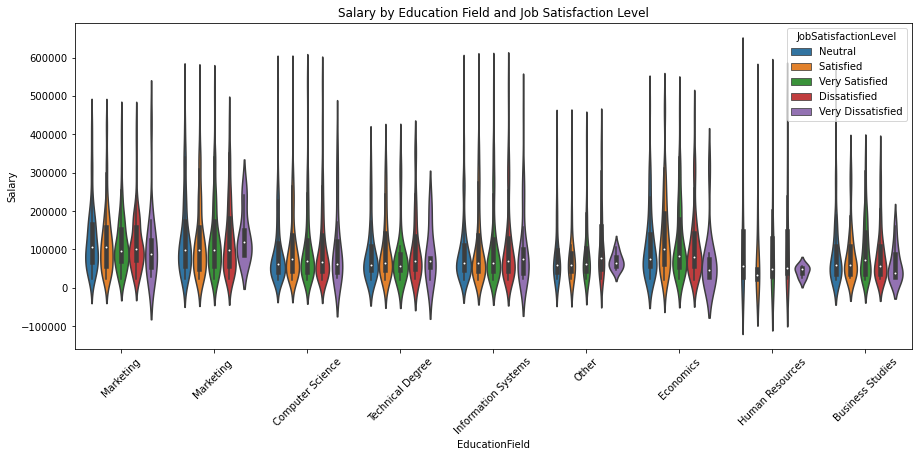

In [39]:
plt.figure(figsize=(15, 6))
sns.violinplot(x='EducationField', y='Salary', hue='JobSatisfactionLevel', data=final_merge)
plt.title('Salary by Education Field and Job Satisfaction Level')
plt.xticks(rotation=45)
plt.show()

top employee by salary

In [40]:
top_employees_by_salary = Employee.sort_values(by='Salary', ascending=False).head(10)
top_employees = top_employees_by_salary[['EmployeeID', 'FirstName', 'LastName', 'JobRole', 'Salary','YearsAtCompany','YearsInMostRecentRole','YearsSinceLastPromotion']]
top_employees

,EmployeeID,FirstName,LastName,JobRole,Salary,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion
385,17AE-E715,Norbie,Mosdill,Analytics Manager,547204,8,7,8
397,DF63-0D3C,Roda,Costin,Analytics Manager,546549,8,8,8
65,5731-90E6,Leonidas,Clarke-Williams,Analytics Manager,542695,10,5,5
1167,1A7C-19DB,Randi,Oswick,Engineering Manager,539998,1,0,0
1054,98EE-8547,Lock,Pierson,Analytics Manager,531629,1,0,1
961,8892-77D8,Rodrique,Rohlfing,Engineering Manager,519361,3,2,3
1031,43DD-6998,Angelia,Letrange,Analytics Manager,517695,3,2,2
159,16FB-8835,Albina,Baston,Engineering Manager,514945,9,4,7
239,134B-4157,Stearne,Axelbee,Analytics Manager,513608,9,4,7
934,3CFD-6622,Adelina,Bittlestone,Analytics Manager,513325,3,0,0
